### Packages imports

In [11]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import math
import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import operator
from sklearn.manifold import TSNE
from ggplot import *

### Data imports

In [3]:
train_data = pd.read_csv('/Users/raphael/Library/Mobile Documents/com~apple~CloudDocs/MasterDS/Telecom_Cours/Big_Data_Mining_SD701/TP/kaggle/train-set.csv', header= 0) 
test_data = pd.read_csv('/Users/raphael/Library/Mobile Documents/com~apple~CloudDocs/MasterDS/Telecom_Cours/Big_Data_Mining_SD701/TP/kaggle/test-set.csv', header= 0)  

In [4]:
# Print a first view of the data
print(train_data)

            Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            1       2611     326     20                               120   
1            2       2772     324     17                                42   
2            3       2764       4     14                               480   
3            4       3032     342      9                                60   
4            5       2488      23     11                               117   
5            6       2968      83      8                               390   
6            7       3027      11      6                               534   
7            8       3216     277      9                                67   
8            9       3242     262      5                               849   
9           10       3315      61     15                               120   
10          11       3221     165      3                               520   
11          12       2366      17     34                        

In [5]:
# Print the shape of the data
print('Train data size: {} rows, {} columns'.format(train_data.shape[0],train_data.shape[1] ))
print('Test data size: {} rows, {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data size: 528720 rows, 56 columns
Test data size: 226595 rows, 55 columns


In [6]:
# Extract a list containing the features columns names
features_columns = [col for col in train_data.drop(["Cover_Type"], axis = 1).columns]
print(features_columns)

# Extract a list with only the first features columns names
sub_features_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']


['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


### Data exploration

In [10]:
print("Null Values : ")
print(train_data.isnull().sum())
print("Data Types : ")
print(train_data.dtypes)

Null Values : 
Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10              

In [ ]:
# Plot a correlation heatpmap in order to find redundant features
corr = train_data.corr()
corr = (corr)
colormap = plt.cm.RdBu
plt.figure(figsize=(140,120))
plt.title('Pearson Correlation of Features', y=1.05, size=140)
sns.heatmap(corr,linewidths=0.4,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot = True)
plt.show()

In [ ]:
# Plot pairwise correlations
correlations = corr.unstack()
sorted_correlations = correlations.sort_values(kind="quicksort")
corr_pairs = []
corr_values = []
for i in range(len(sorted_correlations)):
    corr_pairs.append(sorted_correlations.index[i][0]+" & "+sorted_correlations.index[i][1])
    corr_values.append(sorted_correlations[i])
corr_df = pd.DataFrame({'corr_pairs': corr_pairs,'corr_values': corr_values})
    
ax = corr_df.plot.bar(x='corr_pairs', y='corr_values', rot=90, figsize=(50, 25))
plt.xlabel('corr_pairs', fontsize=4)
plt.ylabel('correlations', fontsize=4)
plt.show()

In [16]:
# Features displaying a high correlation with the Cover Type
corr_y_list = {}

for col in train_data.columns :
    corr_y_list[col] = (train_data[col].corr(train_data['Cover_Type']))

high_corr = dict(sorted(corr_y_list.items(), key=operator.itemgetter(1), reverse=True)[:20])
for key, value in high_corr.items():
    print(key, value)

Cover_Type 1.0
Wilderness_Area4 0.32097383602343327
Soil_Type10 0.24173506193607644
Soil_Type38 0.16138695708639877
Soil_Type39 0.15995942817677175
Slope 0.14747694389431906
Soil_Type40 0.1299291958086688
Soil_Type2 0.11869652682697251
Soil_Type6 0.11232660401538175
Soil_Type4 0.09814102817426856
Soil_Type17 0.09213916640028191
Soil_Type1 0.09020640209547456
Soil_Type35 0.08112096961326241
Vertical_Distance_To_Hydrology 0.08041822619188055
Soil_Type5 0.0783255213399494
Soil_Type37 0.07688460764855495
Soil_Type3 0.06779466442211705
Soil_Type14 0.06679445480800235
Wilderness_Area3 0.06632417597153457
Soil_Type11 0.034973845444582506


In [ ]:
# Display pairplots of the first features in order to have a broad idea of the features distributions
# and pairwise relationships
with sns.axes_style('white'): 
    scatter_matrix(train_data[sub_features_columns], figsize=(14, 14), diagonal="kde") 
plt.show()

/Users/raphael/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Elevation')

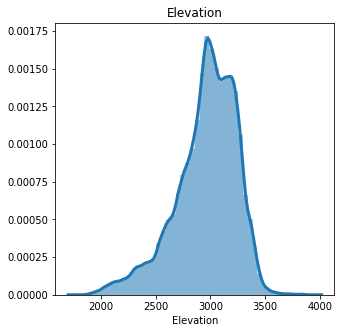

In [31]:
# Distribution of a single feature
fig2, ax = plt.subplots(figsize=(5,5))
toplot = train_data[sub_features_columns[0]]
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
plt.title(sub_features_columns[0])

In [ ]:
# Plot histograms in order to understand better the distribution of single features taken apart
train_data[sub_features_columns].hist(figsize=(16,10), bins=50) 
plt.show()

In [ ]:
# Pairwise plot of Elevation vs HD Hydrology with a colormap corresponding to the Cover Type
plt.figure(figsize=(8,8)) 
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Hydrology, c=train_data.Cover_Type, s=75, cmap=plt.cm.Greens_r) 
plt.xlabel("Elevation") 
plt.ylabel("Horizontal Distance To Hydrology") 
plt.show()

In [ ]:
# Construct a plot showing the most important features in the dataset using a Random Forest Classifier
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(train_data.drop("Cover_Type",axis=1), train_data["Cover_Type"])

importances_rf = rnd_clf.feature_importances_
indices_rf = np.argsort(importances_rf)

n = len(indices_rf)
sorted_features_rf = [0] * n;  
for i in range(0,n): 
    sorted_features_rf[indices_rf[i]] = features_columns[i] 

plt.figure(figsize=(140,120) )
plt.title('Random Forest Features Importance')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), sorted_features_rf)
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

In [ ]:
# Construct a plot showing the most important features in the dataset using a Grandient Boosting Classifier
rnd_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0)
rnd_clf.fit(train_data.drop("Cover_Type",axis=1), train_data["Cover_Type"])

importances_gb = rnd_clf.feature_importances_
indices_gb = np.argsort(importances_gb)

n = len(indices_gb)
sorted_features_gb = [0] * n;  
for i in range(0,n): 
    sorted_features_gb[indices_gb[i]] = features_columns[i] 

plt.figure(figsize=(140,120) )
plt.title('Random Forest Features Importance')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], color='b', align='center')
plt.yticks(range(len(indices_gb)), sorted_features_gb)
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()


### Features engineering

#### Using rational analysis on basic features

In [60]:
# Create two new columns named Slope hydrology and Slope hydrology percent and remove any infinite values that may result
train_data['slope_hyd'] = np.sqrt(train_data.Vertical_Distance_To_Hydrology**2 + train_data.Horizontal_Distance_To_Hydrology**2)
train_data.slope_hyd=train_data.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) 
train_data['slope_hyd_pct'] = train_data.Vertical_Distance_To_Hydrology / train_data.Horizontal_Distance_To_Hydrology
train_data.slope_hyd_pct=train_data.slope_hyd_pct.map(lambda x: 0 if np.isinf(x) else x)

# Apply changes to test_data as well
test_data['slope_hyd'] = np.sqrt(test_data.Vertical_Distance_To_Hydrology**2 + test_data.Horizontal_Distance_To_Hydrology**2)
test_data.slope_hyd=test_data.slope_hyd.map(lambda x: 0 if np.isinf(x) else x)
test_data['slope_hyd_pct'] = test_data.Vertical_Distance_To_Hydrology / test_data.Horizontal_Distance_To_Hydrology
test_data.slope_hyd_pct=test_data.slope_hyd_pct.map(lambda x: 0 if np.isinf(x) else x)

In [61]:
# Replace any NaN or inf value by zero
train_data = train_data.replace(np.nan, 0)
test_data = test_data.replace(np.nan, 0)
train_data = train_data.replace(-np.inf, 0)
test_data = test_data.replace(-np.inf, 0)
print(train_data.isnull().values.any(),test_data.isnull().values.any())

False False


In [62]:
# Elevation adjusted by Horizontal distance to Hyrdrology 
train_data['Elev_to_HD_Hyd']=train_data.Elevation - 0.2 * train_data.Horizontal_Distance_To_Hydrology 
test_data['Elev_to_HD_Hyd']=test_data.Elevation - 0.2 * test_data.Horizontal_Distance_To_Hydrology 
#Elevation adjusted by Horizontal distance to Roadways 
train_data['Elev_to_HD_Road']=train_data.Elevation - 0.05 * train_data.Horizontal_Distance_To_Roadways
test_data['Elev_to_HD_Road']=test_data.Elevation - 0.05 * test_data.Horizontal_Distance_To_Roadways
#Elevation adjusted by Vertical distance to Roadways 
train_data['Elev_to_VD_Hyd']=train_data.Elevation - train_data.Vertical_Distance_To_Hydrology 
test_data['Elev_to_VD_Hyd']=test_data.Elevation - test_data.Vertical_Distance_To_Hydrology

In [63]:
# Mean distance to Amenities 
train_data['Mean_Amenities']=(train_data.Horizontal_Distance_To_Fire_Points + train_data.Horizontal_Distance_To_Hydrology + train_data.Horizontal_Distance_To_Roadways) / 3 
test_data['Mean_Amenities']=(test_data.Horizontal_Distance_To_Fire_Points + test_data.Horizontal_Distance_To_Hydrology + test_data.Horizontal_Distance_To_Roadways) / 3 
# Mean Distance to Fire and Water 
train_data['Mean_Fire_Hyd']=(train_data.Horizontal_Distance_To_Fire_Points + train_data.Horizontal_Distance_To_Hydrology) / 2
test_data['Mean_Fire_Hyd']=(test_data.Horizontal_Distance_To_Fire_Points + test_data.Horizontal_Distance_To_Hydrology) / 2

In [64]:
# Create additional features
train_data['Mean_Hillshade']=(train_data.Hillshade_9am + train_data.Hillshade_Noon + train_data.Hillshade_3pm) / 3
test_data['Mean_Hillshade']=(test_data.Hillshade_9am + test_data.Hillshade_Noon + test_data.Hillshade_3pm) / 3

train_data['Log_Elevation'] = np.log(train_data.Elevation)
test_data['Log_Elevation'] = np.log(test_data.Elevation)

train_data['9am_Hillshade_squared'] = train_data.Hillshade_9am ** 2
test_data['9am_Hillshade_squared'] = test_data.Hillshade_9am ** 2

train_data['Noon_Hillshade_squared'] = train_data.Hillshade_Noon ** 2
test_data['Noon_Hillshade_squared'] = test_data.Hillshade_Noon ** 2

train_data['3pm_Hillshade_squared'] = train_data.Hillshade_3pm ** 2
test_data['3pm_Hillshade_squared'] = test_data.Hillshade_3pm ** 2

train_data['9am*Noon_Hillshade_squared'] = train_data.Hillshade_9am * train_data.Hillshade_Noon
test_data['9am*Noon_Hillshade_squared'] = test_data.Hillshade_9am * test_data.Hillshade_Noon

train_data['9am*3pm_Hillshade_squared'] = train_data.Hillshade_9am * train_data.Hillshade_3pm
test_data['9am*3pm_Hillshade_squared'] = test_data.Hillshade_9am * test_data.Hillshade_3pm

train_data['3pm*Noon_Hillshade_squared'] = train_data.Hillshade_3pm * train_data.Hillshade_Noon
test_data['3pm*Noon_Hillshade_squared'] = test_data.Hillshade_3pm * test_data.Hillshade_Noon

#### Using systematic combinations of basic features

In [65]:
features_basis = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [66]:
train_data_2 = train_data[features_basis].copy()

for pair in itertools.combinations(train_data_2.columns, 2):
    new_col = '*'.join(pair)
    train_data_2[new_col] = train_data_2[pair[0]] * train_data_2[pair[1]]
    
test_data_2 = test_data[features_basis].copy()

for pair in itertools.combinations(test_data_2.columns, 2):
    new_col = '*'.join(pair)
    test_data_2[new_col] = test_data_2[pair[0]] * test_data_2[pair[1]]

features_columns_product = [col for col in train_data_2.columns]

In [67]:
train_data_3 = train_data[features_basis].copy()

for pair in itertools.combinations(train_data_3.columns, 2):
    new_col = '-'.join(pair)
    train_data_3[new_col] = train_data_3[pair[0]] - train_data_3[pair[1]]
    
test_data_3 = test_data[features_basis].copy()

for pair in itertools.combinations(test_data_3.columns, 2):
    new_col = '-'.join(pair)
    test_data_3[new_col] = test_data_3[pair[0]] - test_data_3[pair[1]]

features_columns_difference = [col for col in train_data_3.columns]

In [68]:
train_data_4 = train_data[features_basis].copy()

for pair in itertools.combinations(train_data_4.columns, 2):
    new_col = '+'.join(pair)
    train_data_4[new_col] = train_data_4[pair[0]] + train_data_4[pair[1]]
    
test_data_4 = test_data[features_basis].copy()

for pair in itertools.combinations(test_data_4.columns, 2):
    new_col = '+'.join(pair)
    test_data_4[new_col] = test_data_4[pair[0]] + test_data_4[pair[1]]

features_columns_difference = [col for col in train_data_4.columns]

In [69]:
train_data_5 = train_data[features_basis].copy()

for pair in itertools.combinations(train_data_5.columns, 3):
    new_col = '+'.join(pair)
    train_data_5[new_col] = train_data_5[pair[0]] + train_data_5[pair[1]]+train_data_5[pair[2]]
    
test_data_5 = test_data[features_basis].copy()

for pair in itertools.combinations(test_data_5.columns, 3):
    new_col = '+'.join(pair)
    test_data_5[new_col] = test_data_5[pair[0]] + test_data_5[pair[1]]+test_data_5[pair[2]]
    
features_columns_difference = [col for col in train_data_5.columns]

In [70]:
train_data = pd.concat([train_data, train_data_2.iloc[:,14:], train_data_3.iloc[:,14:], train_data_4.iloc[:,14:], train_data_5.iloc[:,14:]], axis=1, sort=False)
test_data = pd.concat([test_data, test_data_2.iloc[:,14:], test_data_3.iloc[:,14:], test_data_4.iloc[:,14:], test_data_5.iloc[:,14:]], axis=1, sort=False)

In [71]:
features_columns = [col for col in train_data.drop(["Cover_Type"], axis = 1).columns]

#### Replacement of the outliers

In [78]:
# For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_columns: 
    quartile_1,quartile_3 =np.nanpercentile(train_data[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    train_data[col] = np.where(train_data[col] > upper_bound,upper_bound, train_data[col])
    train_data[col] = np.where(train_data[col] < lower_bound,lower_bound, train_data[col])
    train_data[col]=train_data[col].mask(train_data[col] == 0,0.01)

# Same for test sample
for col in features_columns: 
    quartile_1,quartile_3 =np.nanpercentile(test_data[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    test_data[col] = np.where(test_data[col] > upper_bound,upper_bound, test_data[col])
    test_data[col] = np.where(test_data[col] < lower_bound,lower_bound, test_data[col])
    test_data[col]=test_data[col].mask(test_data[col] == 0,0.01) 

### Evaluation of the features engineering

In [73]:
# Let's see if our newly created features are ranked high in terms of importance compared to the original ones
rnd_clf = ExtraTreesClassifier(n_estimators= 100, criterion='gini', max_depth= 150, bootstrap=True, n_jobs=-1, verbose=2, warm_start=True)
rnd_clf.fit(train_data.drop("Cover_Type",axis=1), train_data["Cover_Type"])

importances_rf = rnd_clf.feature_importances_
indices_rf = np.argsort(importances_rf)

n = len(indices_rf)
sorted_features_rf = [0] * n;  
for i in range(0,n): 
    sorted_features_rf[indices_rf[i]] = features_columns[i] 

plt.figure(figsize=(140,120) )
plt.title('Random Forest Features Importance')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), sorted_features_rf)
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.show()

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.3s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


In [ ]:
best_features = sorted_features_rf[500:]
worst_features = sorted_features_rf[:10]

In [37]:
# This is only indicative, it has no impact on our score
# Let's use the Lasso regression to find features with null coefficients
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(train_data.drop("Cover_Type",axis=1), train_data["Cover_Type"])
train_data_lasso = train_data.loc[:, lasso.coef_ > 0 ]
test_data_lasso = test_data.loc[:, lasso.coef_ > 0]
train_data_lasso.columns

Index(['Id', '9am_Hillshade_squared', 'Noon_Hillshade_squared',
       '3pm_Hillshade_squared', 'Aspect-Vertical_Distance_To_Hydrology',
       'Aspect-Hillshade_3pm',
       'Horizontal_Distance_To_Hydrology-Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Hydrology-Hillshade_3pm',
       'Horizontal_Distance_To_Hydrology-Wilderness_Area4',
       'Vertical_Distance_To_Hydrology-Hillshade_3pm',
       'Aspect+Horizontal_Distance_To_Hydrology', 'Slope+Wilderness_Area4'],
      dtype='object')

### Model fitting

In [ ]:
# Random Forest Classifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 200],
    'max_features': [4, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [50, 150, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
model = grid_search.fit(train_data_small.drop(worst_features + ['Cover_Type'], axis = 1), train_data_small['Cover_Type'])
model.best_estimator_

In [17]:
# We fit the model on the whole train dataset
clf = RandomForestClassifier(criterion='gini', n_estimators = 1000,max_depth=140, max_features = 25, max_leaf_nodes=None, bootstrap= True, min_samples_leaf=1, min_samples_split = 2, n_jobs=-1, oob_score=False, random_state=None)
model = clf.fit(train_data.drop(['Id', 'Cover_Type'], axis = 1), train_data['Cover_Type'])

# We make predictions on the validation set (K-fold methodology)
pred_test_rf = cross_val_predict(clf, train_data.drop(['Id', 'Cover_Type'], axis = 1),train_data['Cover_Type'], cv=8, method="predict")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Extra Trees Classifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'warm_start' : [True],
    'verbose' : [2],
    'bootstrap' : [True],
    'n_jobs' : [-1],
    'max_leaf_nodes': [150, 300],
    'max_features': [50, 150],
    'min_samples_split': [5, 25],
    'min_samples_leaf': [5, 15],
    'max_depth': [25, 50],
    'n_estimators': [50]
}
# Create a based model
et = ExtraTreesClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = et, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
model = grid_search.fit(train_data_small.drop(['Id', 'Cover_Type'], axis = 1), train_data_small['Cover_Type'])
model.best_estimator_

In [101]:
# We fit the model on the whole train dataset
clf = ExtraTreesClassifier(n_estimators= 501, criterion='gini', max_depth= 469, n_jobs=-1, max_features = 20, verbose=2, warm_start=True)
model = clf.fit(train_data.drop(['Id', 'Cover_Type'], axis = 1), train_data['Cover_Type'])

# We make predictions on the validation set (K-fold methodology)
pred_test_et = cross_val_predict(clf, train_data.drop(['Id', 'Cover_Type'], axis = 1), train_data['Cover_Type'], cv=8, method="predict")

building tree 1 of 501building tree 2 of 501building tree 3 of 501
building tree 4 of 501


building tree 5 of 501
building tree 6 of 501
building tree 7 of 501
building tree 8 of 501
building tree 9 of 501
building tree 10 of 501
building tree 11 of 501
building tree 12 of 501
building tree 13 of 501
building tree 14 of 501
building tree 15 of 501
building tree 16 of 501
building tree 17 of 501
building tree 18 of 501
building tree 19 of 501
building tree 20 of 501
building tree 21 of 501
building tree 22 of 501
building tree 23 of 501
building tree 24 of 501
building tree 25 of 501
building tree 26 of 501
building tree 27 of 501
building tree 28 of 501
building tree 29 of 501
building tree 30 of 501
building tree 31 of 501
building tree 32 of 501
building tree 33 of 501
building tree 34 of 501
building tree 35 of 501
building tree 36 of 501


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.5s


building tree 37 of 501
building tree 38 of 501
building tree 39 of 501
building tree 40 of 501
building tree 41 of 501
building tree 42 of 501
building tree 43 of 501
building tree 44 of 501
building tree 45 of 501
building tree 46 of 501
building tree 47 of 501
building tree 48 of 501
building tree 49 of 501
building tree 50 of 501
building tree 51 of 501
building tree 52 of 501
building tree 53 of 501
building tree 54 of 501
building tree 55 of 501
building tree 56 of 501
building tree 57 of 501
building tree 58 of 501
building tree 59 of 501
building tree 60 of 501
building tree 61 of 501
building tree 62 of 501
building tree 63 of 501
building tree 64 of 501
building tree 65 of 501
building tree 66 of 501
building tree 67 of 501
building tree 68 of 501
building tree 69 of 501
building tree 70 of 501
building tree 71 of 501
building tree 72 of 501
building tree 73 of 501
building tree 74 of 501
building tree 75 of 501
building tree 76 of 501
building tree 77 of 501
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min


building tree 158 of 501
building tree 159 of 501
building tree 160 of 501
building tree 161 of 501
building tree 162 of 501
building tree 163 of 501
building tree 164 of 501
building tree 165 of 501
building tree 166 of 501
building tree 167 of 501
building tree 168 of 501
building tree 169 of 501
building tree 170 of 501
building tree 171 of 501
building tree 172 of 501
building tree 173 of 501
building tree 174 of 501
building tree 175 of 501
building tree 176 of 501
building tree 177 of 501
building tree 178 of 501
building tree 179 of 501
building tree 180 of 501
building tree 181 of 501
building tree 182 of 501
building tree 183 of 501
building tree 184 of 501
building tree 185 of 501
building tree 186 of 501
building tree 187 of 501
building tree 188 of 501
building tree 189 of 501
building tree 190 of 501
building tree 191 of 501
building tree 192 of 501
building tree 193 of 501
building tree 194 of 501
building tree 195 of 501
building tree 196 of 501
building tree 197 of 501


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.4min


building tree 361 of 501
building tree 362 of 501
building tree 363 of 501
building tree 364 of 501
building tree 365 of 501
building tree 366 of 501
building tree 367 of 501
building tree 368 of 501
building tree 369 of 501
building tree 370 of 501
building tree 371 of 501
building tree 372 of 501
building tree 373 of 501
building tree 374 of 501
building tree 375 of 501
building tree 376 of 501
building tree 377 of 501
building tree 378 of 501
building tree 379 of 501
building tree 380 of 501
building tree 381 of 501
building tree 382 of 501
building tree 383 of 501
building tree 384 of 501
building tree 385 of 501
building tree 386 of 501
building tree 387 of 501
building tree 388 of 501
building tree 389 of 501
building tree 390 of 501
building tree 391 of 501
building tree 392 of 501
building tree 393 of 501
building tree 394 of 501
building tree 395 of 501
building tree 396 of 501
building tree 397 of 501
building tree 398 of 501
building tree 399 of 501
building tree 400 of 501


[Parallel(n_jobs=-1)]: Done 501 out of 501 | elapsed: 11.8min finished


In [ ]:
# Gradient Boosting Classifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate': [0.02, 0.05, 0.1],
    'min_samples_split': [100, 250, 400],
    'min_samples_leaf': [20, 50, 100],
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 150, 300]
    'max_features' : [10, 20, 25]
}
# Create a based model
gb = GradientBoostingClassifier
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
model = grid_search.fit(train_data_small.drop(['Id', 'Cover_Type'], axis = 1), train_data_small['Cover_Type'])
model.best_estimator_

In [ ]:
# We fit the model on the whole train dataset
clf = GradientBoostingClassifier(n_estimators=400, learning_rate=0.03, min_samples_leaf=20,max_depth=40,random_state=0)
model = clf.fit(train_data.drop(['Id', 'Cover_Type'], axis = 1), train_data['Cover_Type'])

# We make predictions on the validation set (K-fold methodology)
pred_test_gb = cross_val_predict(clf, train_data.drop(['Id', 'Cover_Type'], axis = 1),train_data['Cover_Type'], cv=8, method="predict")

In [ ]:
# This is a function to plot learning curves

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = train_data, train_data['Cover_Type']


title = "Learning Curves (ExtraTrees)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator =  ExtraTreesClassifier(n_estimators= 10, criterion='gini', max_depth= 50, bootstrap=True, n_jobs=-1, verbose=2, warm_start=True)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

### Submit predictions

In [103]:
pred_test_et = model.predict(test_data.drop('Id', axis =1))
predictions = pd.DataFrame({'Id':test_data['Id'].astype(int), 'Cover_Type':pred_test_et}, columns = ['Id','Cover_Type']).set_index('Id')
predictions.to_csv('kaggle_submission_RL_et-top-top*.csv', header=True)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 501 out of 501 | elapsed:   30.3s finished
